**Covid 19 Analysis**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from fast_ml.outlier_treatment import OutlierTreatment

In [129]:
covid_data = pd.read_csv('/kaggle/input/covid19-dataset/Covid Data.csv')

In [130]:
covid_data.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'],
      dtype='object')

In [131]:
covid_data.head(10)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
5,2,1,1,2,9999-99-99,2,1,40,2,2,...,2,2,2,2,2,2,2,2,3,2
6,2,1,1,1,9999-99-99,97,2,64,2,2,...,2,2,2,2,2,2,2,2,3,97
7,2,1,1,1,9999-99-99,97,1,64,2,1,...,2,1,1,2,2,2,1,2,3,97
8,2,1,1,2,9999-99-99,2,2,37,2,1,...,2,2,1,2,2,1,2,2,3,2
9,2,1,1,2,9999-99-99,2,2,25,2,2,...,2,2,2,2,2,2,2,2,3,2


In [132]:
count = (covid_data['DATE_DIED'] == '9999-99-99').sum()
print(count)

971633


In [133]:
covid_data.dtypes

USMER                    int64
MEDICAL_UNIT             int64
SEX                      int64
PATIENT_TYPE             int64
DATE_DIED               object
INTUBED                  int64
PNEUMONIA                int64
AGE                      int64
PREGNANT                 int64
DIABETES                 int64
COPD                     int64
ASTHMA                   int64
INMSUPR                  int64
HIPERTENSION             int64
OTHER_DISEASE            int64
CARDIOVASCULAR           int64
OBESITY                  int64
RENAL_CHRONIC            int64
TOBACCO                  int64
CLASIFFICATION_FINAL     int64
ICU                      int64
dtype: object

In [134]:
covid_data.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.632194e+00,8.980565e+00,1.499259e+00,1.190765e+00,7.952288e+01,3.346831e+00,4.179410e+01,4.976558e+01,2.186404e+00,2.260569e+00,2.242626e+00,2.298132e+00,2.128989e+00,2.435143e+00,2.261810e+00,2.125176e+00,2.257180e+00,2.214333e+00,5.305653e+00,7.955397e+01
std,4.822084e-01,3.723278e+00,4.999997e-01,3.929041e-01,3.686889e+01,1.191288e+01,1.690739e+01,4.751073e+01,5.424242e+00,5.132258e+00,5.114089e+00,5.462843e+00,5.236397e+00,6.646676e+00,5.194850e+00,5.175445e+00,5.135354e+00,5.323097e+00,1.881165e+00,3.682307e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,3.000000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,9.700000e+01
50%,2.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,4.000000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,6.000000e+00,9.700000e+01
75%,2.000000e+00,1.200000e+01,2.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,5.300000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,9.700000e+01
max,2.000000e+00,1.300000e+01,2.000000e+00,2.000000e+00,9.900000e+01,9.900000e+01,1.210000e+02,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,7.000000e+00,9.900000e+01


We have the categorial data also which is time so can change it into numerical.

In [135]:
covid_data.describe(include='O')

,DATE_DIED
count,1048575
unique,401
top,9999-99-99
freq,971633


the date 9999-99-99 indicates that are empty so we should change them.

In [136]:
def died_column(row):
    if row == '9999-99-99':
        return 1
    else:
        return 0
covid_data['DIED'] = covid_data.DATE_DIED.apply(died_column)
covid_data.drop('DATE_DIED', axis=1, inplace=True)

We assigned the value 0 for the people who are dead and value 1 for the people who are not dead

In [137]:
covid_data['DIED']

0          0
1          0
2          0
3          0
4          0
          ..
1048570    1
1048571    1
1048572    1
1048573    1
1048574    1
Name: DIED, Length: 1048575, dtype: int64

In [138]:
covid_data.isnull().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
DIED                    0
dtype: int64

**DATA PREPROCESSING**

In [139]:
for col in covid_data.columns:
    print(col)
    print(covid_data.loc[covid_data[col] == 97, col].count())
    print(covid_data.loc[covid_data[col] == 98, col].count())
    print(covid_data.loc[covid_data[col] == 99, col].count())
    print()

USMER
0
0
0

MEDICAL_UNIT
0
0
0

SEX
0
0
0

PATIENT_TYPE
0
0
0

INTUBED
848544
0
7325

PNEUMONIA
0
0
16003

AGE
135
124
86

PREGNANT
523511
3754
0

DIABETES
0
3338
0

COPD
0
3003
0

ASTHMA
0
2979
0

INMSUPR
0
3404
0

HIPERTENSION
0
3104
0

OTHER_DISEASE
0
5045
0

CARDIOVASCULAR
0
3076
0

OBESITY
0
3032
0

RENAL_CHRONIC
0
3006
0

TOBACCO
0
3220
0

CLASIFFICATION_FINAL
0
0
0

ICU
848544
0
7488

DIED
0
0
0



parsing the missing values of the pregnant column

In [140]:
covid_data.groupby(['PREGNANT', 'SEX'])['SEX'].count()

PREGNANT  SEX
1         1        8131
2         1      513179
97        2      523511
98        1        3754
Name: SEX, dtype: int64

1 for female and 2 for male in sex
according to the above matrix 2 indicates male and can not be pregnant so we can change 97 to 2

In [141]:
covid_data.PREGNANT = covid_data.PREGNANT.replace(97,2)

In [142]:
covid_data.PREGNANT.value_counts()

2     1036690
1        8131
98       3754
Name: PREGNANT, dtype: int64

In [143]:
covid_data.groupby(['INTUBED', 'PATIENT_TYPE'])['PATIENT_TYPE'].count()

INTUBED  PATIENT_TYPE
1        2                33656
2        2               159050
97       1               848544
99       2                 7325
Name: PATIENT_TYPE, dtype: int64

Intubed contains values 1 and 2 indicates 1-yes and 2-no
Intubed means weather the patient is connected to the ventilator or not 
Patient_Type:
1 for returned home and 2 for hospitalization.

In [144]:
covid_data.groupby(['ICU','PATIENT_TYPE'])['PATIENT_TYPE'].count()

ICU  PATIENT_TYPE
1    2                16858
2    2               175685
97   1               848544
99   2                 7488
Name: PATIENT_TYPE, dtype: int64

ICU contains the values 1 - yes or 2-no or 97,99-null values.
Patient_Type:
1 for returned home and 2 for hospitalization.


Here we have no chance of replacing the values and there are more number of missing values in the column so its better to drop them

In [145]:
covid_data = covid_data.drop(['ICU','INTUBED'],axis=1)

In [146]:
covid_data.head(10)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,DIED
0,2,1,1,1,1,65,2,2,2,2,2,1,2,2,2,2,2,3,0
1,2,1,2,1,1,72,2,2,2,2,2,1,2,2,1,1,2,5,0
2,2,1,2,2,2,55,2,1,2,2,2,2,2,2,2,2,2,3,0
3,2,1,1,1,2,53,2,2,2,2,2,2,2,2,2,2,2,7,0
4,2,1,2,1,2,68,2,1,2,2,2,1,2,2,2,2,2,3,0
5,2,1,1,2,1,40,2,2,2,2,2,2,2,2,2,2,2,3,1
6,2,1,1,1,2,64,2,2,2,2,2,2,2,2,2,2,2,3,1
7,2,1,1,1,1,64,2,1,2,2,1,1,2,2,2,1,2,3,1
8,2,1,1,2,2,37,2,1,2,2,2,1,2,2,1,2,2,3,1
9,2,1,1,2,2,25,2,2,2,2,2,2,2,2,2,2,2,3,1


In [147]:
covid_data.drop(covid_data.index[covid_data.PNEUMONIA == 99], axis=0, inplace=True)
covid_data.drop(covid_data.index[covid_data.PREGNANT == 98], axis=0, inplace=True)
covid_data.drop(covid_data.index[covid_data.COPD == 98], axis=0, inplace=True)
covid_data.drop(covid_data.index[covid_data.DIABETES== 98], axis=0, inplace=True)
covid_data.drop(covid_data.index[covid_data.ASTHMA == 98], axis=0, inplace=True)
covid_data.drop(covid_data.index[covid_data.INMSUPR == 98], axis=0, inplace=True)
covid_data.drop(covid_data.index[covid_data.OTHER_DISEASE == 98], axis=0, inplace=True)
covid_data.drop(covid_data.index[covid_data.CARDIOVASCULAR == 98], axis=0, inplace=True)
covid_data.drop(covid_data.index[covid_data.OBESITY == 98], axis=0, inplace=True)
covid_data.drop(covid_data.index[covid_data.RENAL_CHRONIC == 98], axis=0, inplace=True)
covid_data.drop(covid_data.index[covid_data.TOBACCO== 98], axis=0, inplace=True)

In [148]:
for col in covid_data.columns:
    print(col)
    print(covid_data.loc[covid_data[col]==97,col].count())
    print(covid_data.loc[covid_data[col]==98,col].count())
    print(covid_data.loc[covid_data[col]==99,col].count())
    

USMER
0
0
0
MEDICAL_UNIT
0
0
0
SEX
0
0
0
PATIENT_TYPE
0
0
0
PNEUMONIA
0
0
0
AGE
128
115
79
PREGNANT
0
0
0
DIABETES
0
0
0
COPD
0
0
0
ASTHMA
0
0
0
INMSUPR
0
0
0
HIPERTENSION
0
178
0
OTHER_DISEASE
0
0
0
CARDIOVASCULAR
0
0
0
OBESITY
0
0
0
RENAL_CHRONIC
0
0
0
TOBACCO
0
0
0
CLASIFFICATION_FINAL
0
0
0
DIED
0
0
0


In [149]:
covid_data["INFECTED"]=[1 if each<4 else 0 for each in covid_data["CLASIFFICATION_FINAL"]]
covid_data.drop("CLASIFFICATION_FINAL",axis=1,inplace=True)

In [150]:
covid_data.head(10)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,DIED,INFECTED
0,2,1,1,1,1,65,2,2,2,2,2,1,2,2,2,2,2,0,1
1,2,1,2,1,1,72,2,2,2,2,2,1,2,2,1,1,2,0,0
2,2,1,2,2,2,55,2,1,2,2,2,2,2,2,2,2,2,0,1
3,2,1,1,1,2,53,2,2,2,2,2,2,2,2,2,2,2,0,0
4,2,1,2,1,2,68,2,1,2,2,2,1,2,2,2,2,2,0,1
5,2,1,1,2,1,40,2,2,2,2,2,2,2,2,2,2,2,1,1
6,2,1,1,1,2,64,2,2,2,2,2,2,2,2,2,2,2,1,1
7,2,1,1,1,1,64,2,1,2,2,1,1,2,2,2,1,2,1,1
8,2,1,1,2,2,37,2,1,2,2,2,1,2,2,1,2,2,1,1
9,2,1,1,2,2,25,2,2,2,2,2,2,2,2,2,2,2,1,1


**DATA VISUALIZATION**

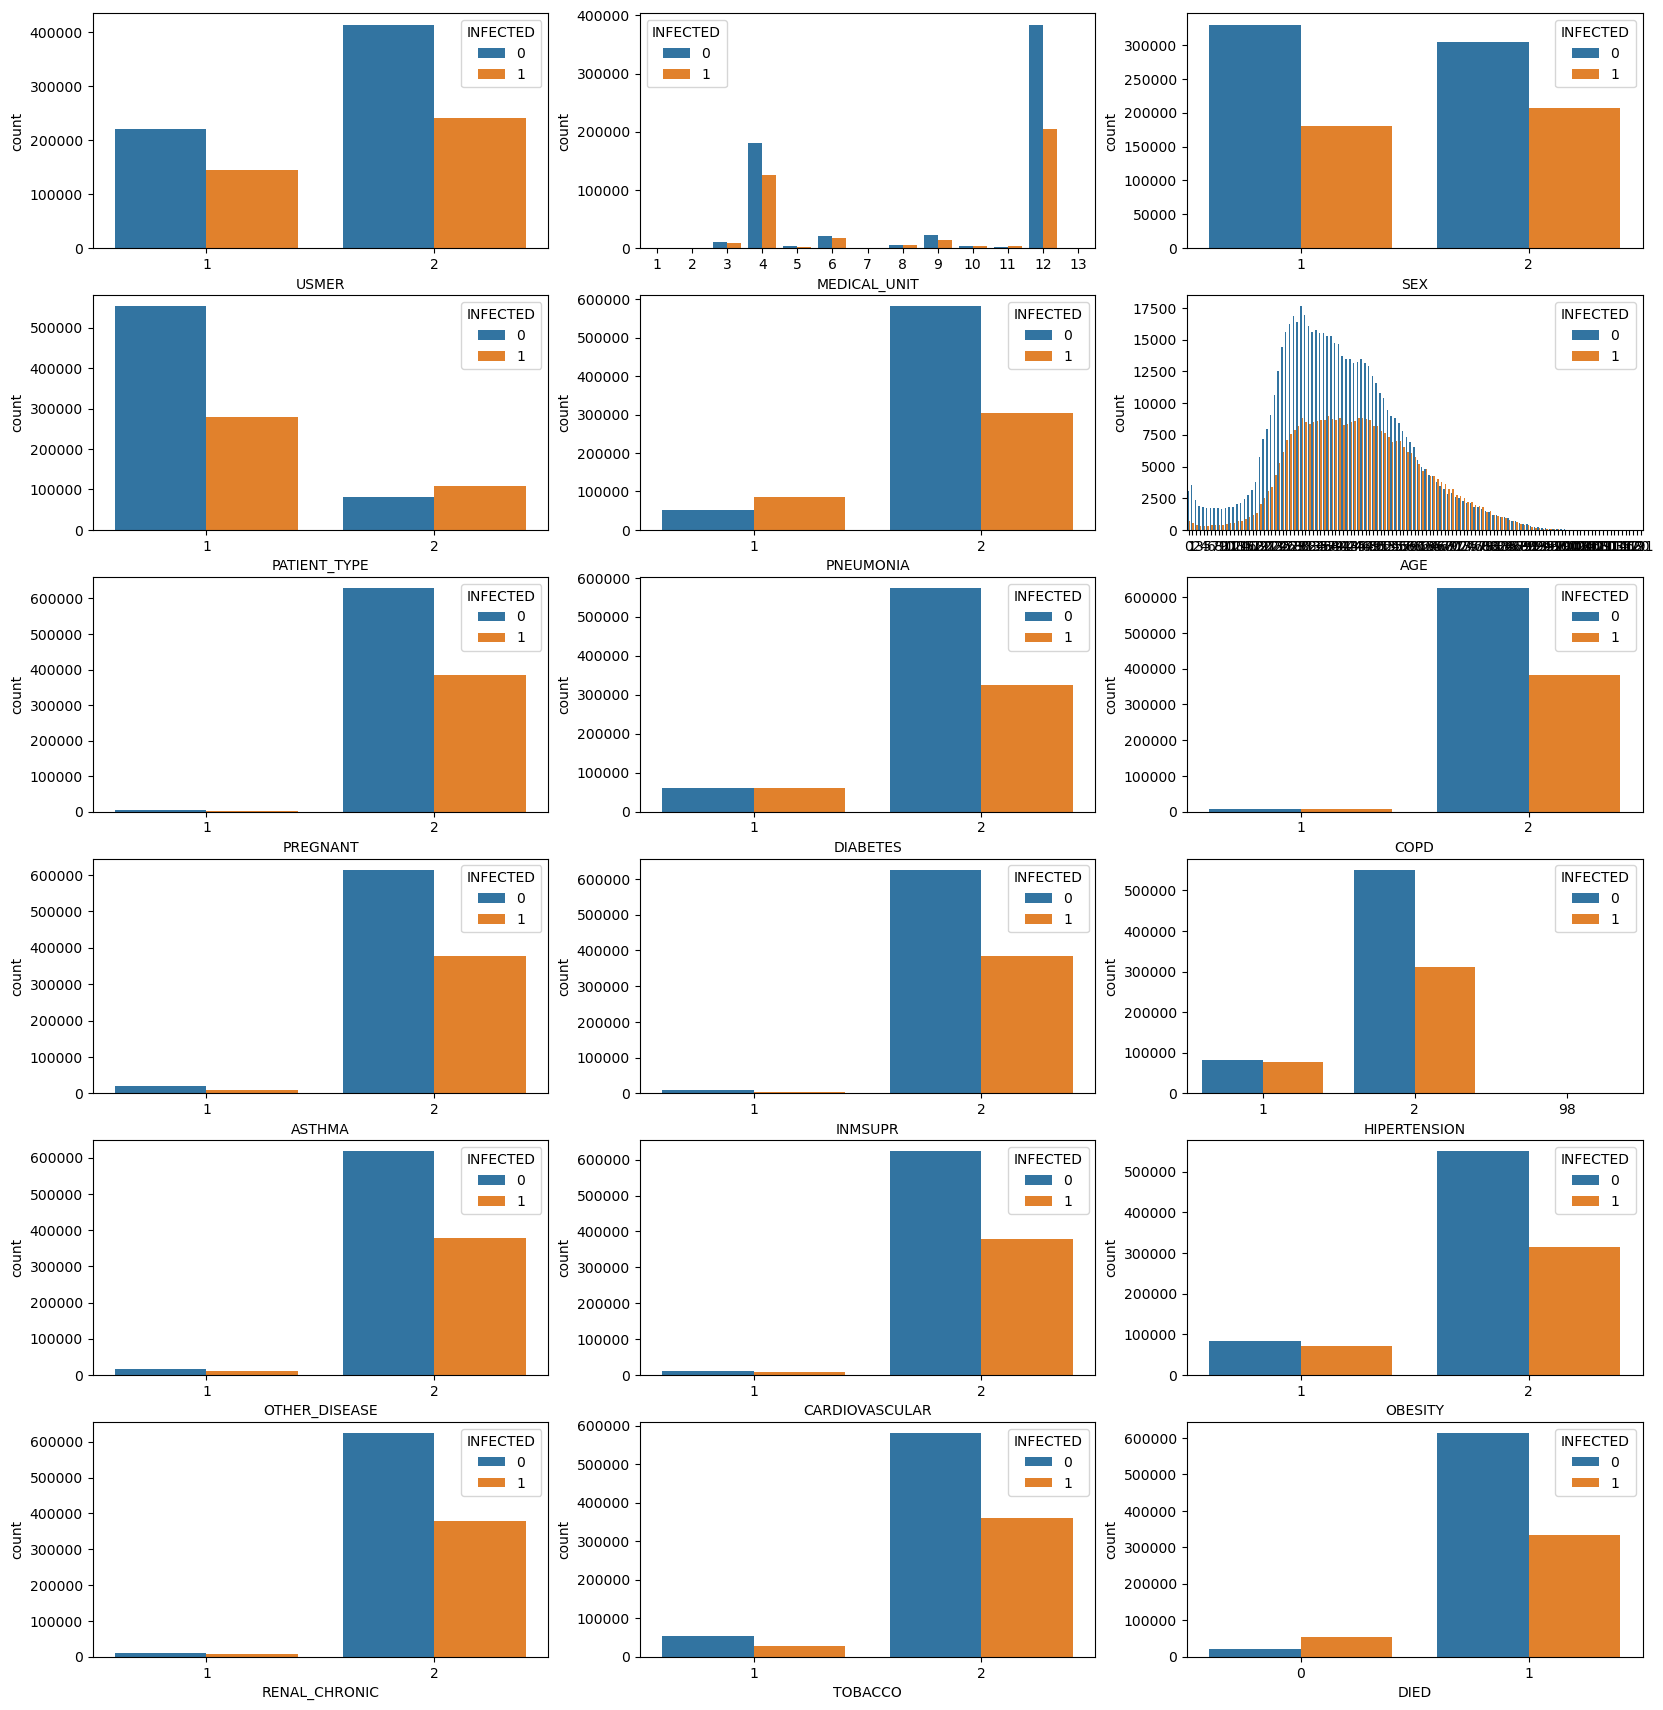

In [151]:
plt.figure(figsize=(20,25))
index=1
x = covid_data.drop('INFECTED',axis=1)
for i in x.columns:
    plt.subplot(7,3,index)
    sns.countplot(data=covid_data,x=i,hue='INFECTED')
    index+=1
plt.show()    

<AxesSubplot:>

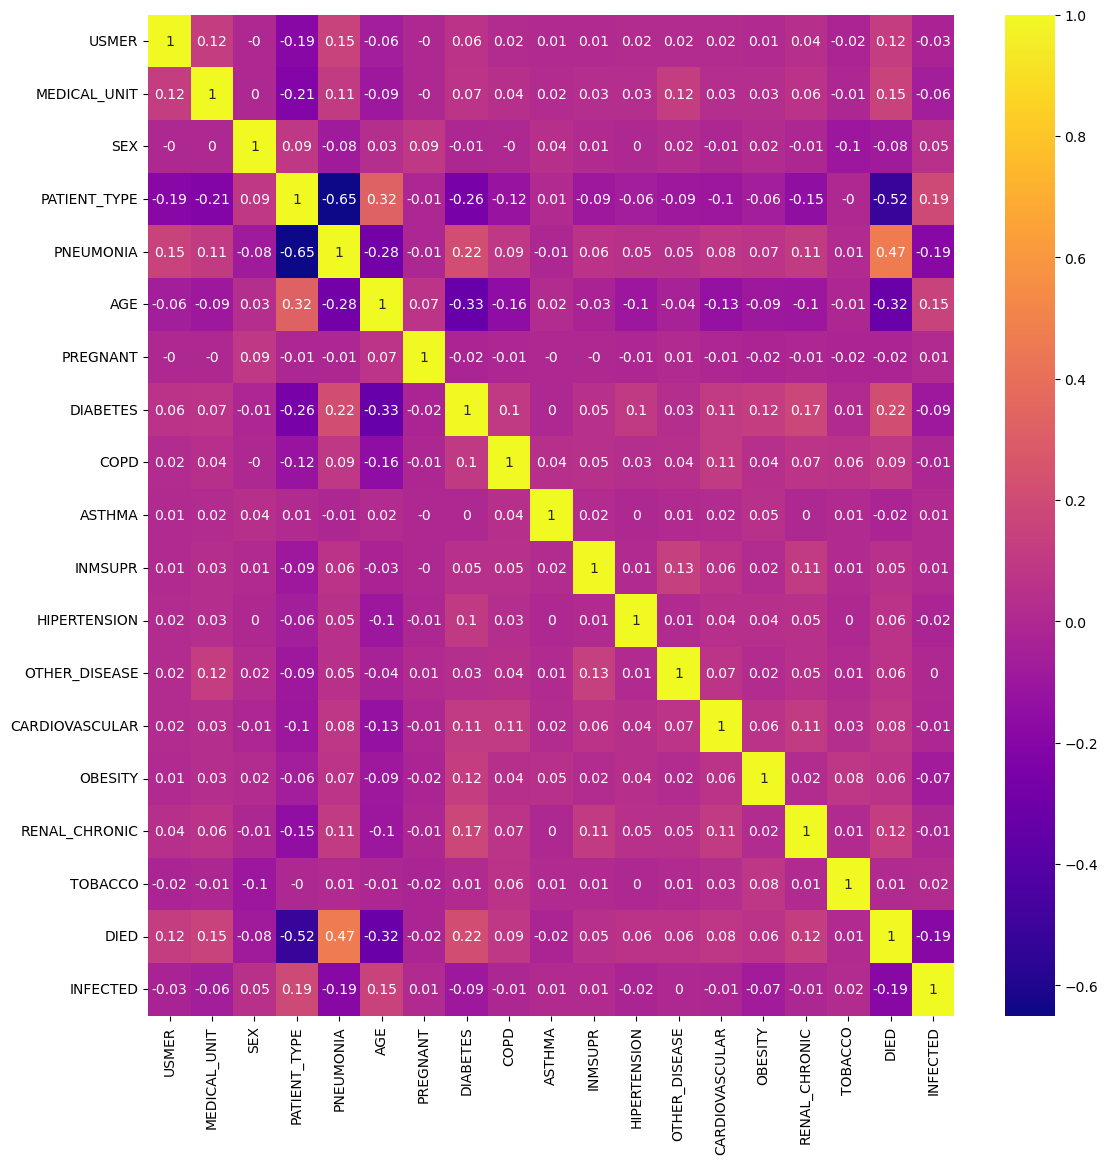

In [152]:
corelation = covid_data.corr().round(2)
plt.figure(figsize=(13,13))
sns.heatmap(corelation,cmap='plasma',annot=True)

In [153]:
covid_data.dtypes

USMER             int64
MEDICAL_UNIT      int64
SEX               int64
PATIENT_TYPE      int64
PNEUMONIA         int64
AGE               int64
PREGNANT          int64
DIABETES          int64
COPD              int64
ASTHMA            int64
INMSUPR           int64
HIPERTENSION      int64
OTHER_DISEASE     int64
CARDIOVASCULAR    int64
OBESITY           int64
RENAL_CHRONIC     int64
TOBACCO           int64
DIED              int64
INFECTED          int64
dtype: object

In [154]:
covid_data

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,DIED,INFECTED
0,2,1,1,1,1,65,2,2,2,2,2,1,2,2,2,2,2,0,1
1,2,1,2,1,1,72,2,2,2,2,2,1,2,2,1,1,2,0,0
2,2,1,2,2,2,55,2,1,2,2,2,2,2,2,2,2,2,0,1
3,2,1,1,1,2,53,2,2,2,2,2,2,2,2,2,2,2,0,0
4,2,1,2,1,2,68,2,1,2,2,2,1,2,2,2,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,2,40,2,2,2,2,2,2,2,2,2,2,2,1,0
1048571,1,13,2,2,2,51,2,2,2,2,2,1,2,2,2,2,2,1,0
1048572,2,13,2,1,2,55,2,2,2,2,2,2,2,2,2,2,2,1,0
1048573,2,13,2,1,2,28,2,2,2,2,2,2,2,2,2,2,2,1,0


In the died column 0 indicated died and 1 indicates not died

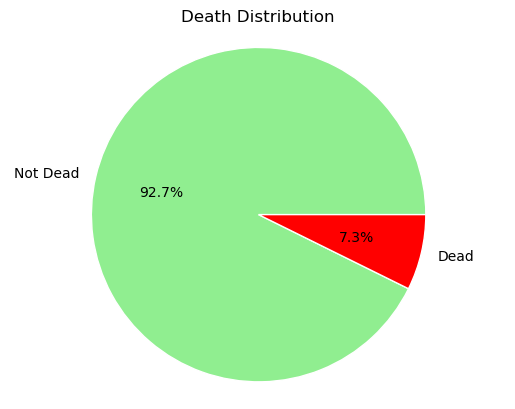

In [155]:
counts = covid_data['DIED'].value_counts()

# plot pie chart
fig, ax = plt.subplots()
ax.pie(counts, labels=['Not Dead', 'Dead'][:len(counts)], autopct='%1.1f%%', startangle=0,wedgeprops={'edgecolor':'#fff'},colors=['#90EE90','#FF0000'])
ax.axis('equal')
ax.set_title('Death Distribution')
plt.show()

From the above pie chart we can observe that the percentage of Not Dead is 92.7 and the percentage of Dead is 7.3 

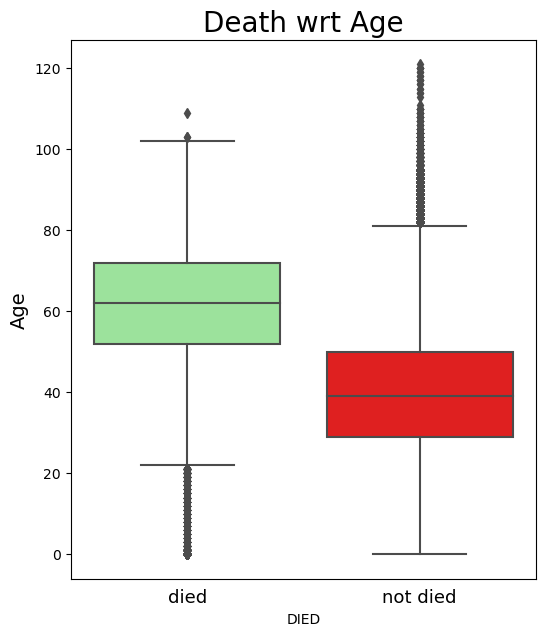

In [156]:
plt.figure(figsize=(6,7))
sns.boxplot(data=covid_data,x='DIED',y='AGE',palette=sns.color_palette(['#90EE90','#FF0000']))
plt.title('Death wrt Age',fontsize=20)
plt.ylabel('Age',fontsize=14)
plt.tick_params(bottom=False)
plt.xticks([0,1],['died','not died'],fontsize=13);

From the graph we can observe that the highly aged people are mostly dead.

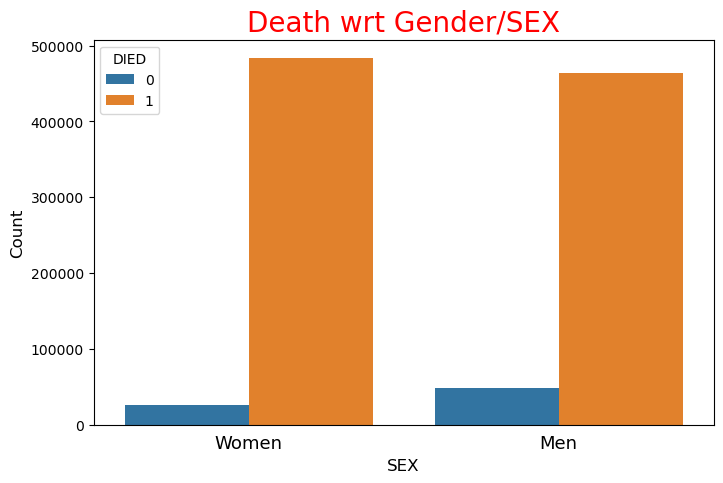

In [157]:
plt.figure(figsize=(8,5))
sns.countplot(data=covid_data,x='SEX',hue='DIED')
plt.title('Death wrt Gender/SEX',fontsize=20,color='r')
plt.xlabel('SEX',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.tick_params(bottom=False)
plt.xticks([0,1],['Women','Men'],fontsize=13);

The ratio of men and women dead are approximately similar so we can not say any specific relation from the data.

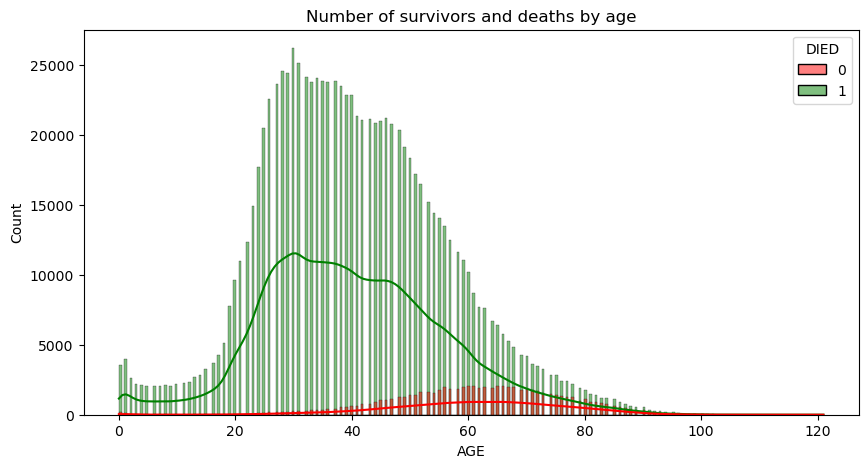

In [158]:
plt.figure(figsize=(10,5))
sns.histplot(x=covid_data.AGE,hue=covid_data.DIED,legend=True,palette=["red","green"],kde=True).set(title="Number of survivors and deaths by age")
plt.show()

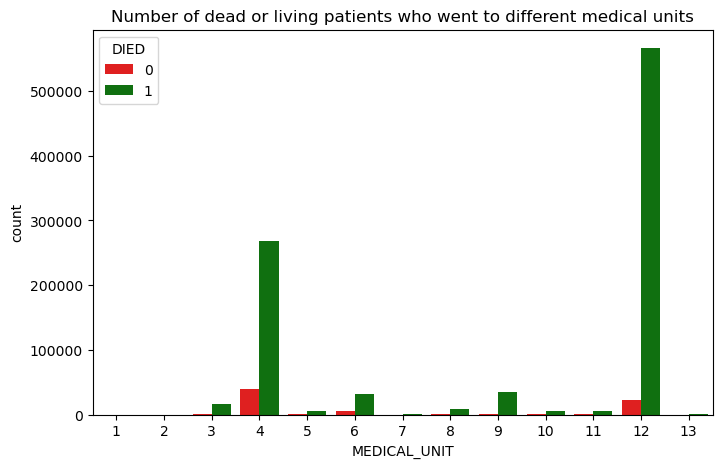

In [159]:
plt.figure(figsize=(8,5))
sns.countplot(x=covid_data.MEDICAL_UNIT,hue=covid_data.DIED,palette=["red","green"]).set(title="Number of dead or living patients who went to different medical units")
plt.show()